In [168]:
import glob
import math
import os
import pickle

import seaborn as sns 
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable
from shapely.geometry import Point, Polygon
from matplotlib.lines import Line2D


In [172]:
with open('outputs/twins_era_identified_regions_min_2.pkl', 'rb') as f:
	regions = pickle.load(f)
df = pd.read_csv('supermag-stations-info.csv')

In [163]:
def converting_from_degrees_to_km(lat_1, lon_1, lat_2, lon_2):

	mean_lat = (lat_1 + lat_2)/2
	x = lon_2 - lon_1
	y = lat_2 - lat_1
	dist_x = x*(111.320*math.cos(math.radians(mean_lat)))
	dist_y = y*110.574

	distance = math.sqrt((dist_x**2)+(dist_y**2))

	return distance

In [33]:
df

,IAGA,GEOLON,GEOLAT,AACGMLON,AACGMLAT,STATION-NAME,OPERATOR-NUM,OPERATORS
0,SON,66.44,25.12,139.81,19.36,Sonmiani,1,INTERMAGNET
1,AMU,210.13,61.24,-93.38,61.32,Anchorage,1,THEMIS
2,YKC,245.52,62.48,-56.85,69.42,Yellowknife,3,CANMOS
3,CBB,254.97,69.12,-47.81,77.05,Cambridge Bay,2,CANMOS
4,RES,265.11,74.69,-35.54,82.93,Resolute Bay,2,CANMOS
...,...,...,...,...,...,...,...,...
569,MHV,37.73,54.94,112.36,51.27,Mikhnevo,1,IZMIRAN
570,NAD,72.51,65.53,147.36,61.94,Nadym,1,IZMIRAN
571,WSE,33.10,66.55,112.22,63.39,White Sea,1,IZMIRAN
572,POD,90.03,61.58,164.07,57.82,Bor,1,IZMIRAN


In [209]:
def plotting_regions(regions, region_numbers, lat_min, lat_max, lon_min, lon_max, lat_med, lon_med, station_info):

	colors = sns.color_palette('tab20', len(regions))
	
	face_alpha = 0.5
	edge_alpha = 0.8

	for i, region in zip(range(0, len(regions), 2), region_numbers):
		poly = regions[f'region_{region}']['shape'].convex_hull
		poly = gpd.GeoDataFrame(geometry=[poly])
		poly['geometry'] = poly['geometry'].translate(xoff=-360)

		if i == 0:
			ax = poly.plot(figsize=(13,8), facecolor=colors[i+1], edgecolor=colors[i], label=region, alpha=0.5)
		else:
			poly.plot(ax=ax, facecolor=colors[i+1], edgecolor=colors[i], label=region, alpha=0.5)
	
	world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
	world['geometry'] = world['geometry'].translate(xoff=-360)


	# Plot the outline of the Earth
	world.boundary.plot(linewidth=1, color='black', ax=plt.gca())

	# station_info.plot(ax=ax, kind='scatter', x='GEOLON', y='GEOLAT')
	# for idx, row in station_info.iterrows():
	# 	ax.annotate(row['IAGA'], (row['GEOLON'], row['GEOLAT']))
	
	# plt.xlim((lon_min-5), (lon_max+5))
	# plt.ylim((lat_min-5), (lat_max+5))
	plt.title(f'Lat: {lat_med} Lon: {lon_med}')
	
	# Create custom legend entries using Line2D
	legend_entries = [Line2D([0], [0], color=colors[i], lw=2, label=reg) for i,reg in zip(range(0,len(colors),2), region_numbers)]
	
	# Add the custom legend to the plot
	# plt.legend(handles=legend_entries)


	plt.show()

/tmp/ipykernel_13808/841919432.py:18: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


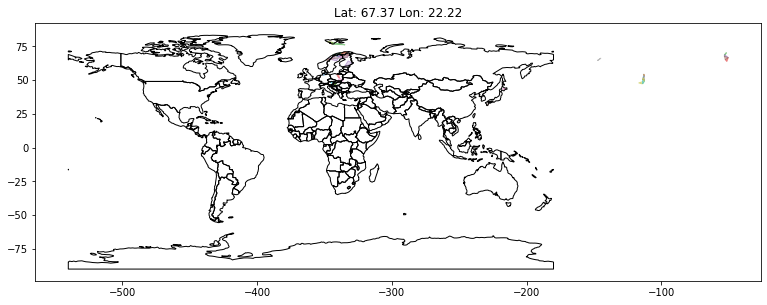

In [210]:
region_numbers = [83,
143,
223,
44,
173,
321,
366,
383,
122,
279,
14,
95,
237,
26,
166,
86,
387,
61,
202,
287,
207,
361,
137,
184,
36,
19,
9,
163,
16,
270,
194,
82,
62,
327,
293,
241,
107,
55,
111]

stations = []

for i in range(len(region_numbers)):
	stations = stations+ regions[f'region_{region_numbers[i]}']['station']

lats = [df.loc[df['IAGA'] == station, 'GEOLAT'].values[0] for station in stations]
lons = [df.loc[df['IAGA'] == station, 'GEOLON'].values[0] for station in stations]

lat_min, lat_max, lat_med = min(lats), max(lats), np.median(lats)
lon_min, lon_max, lon_med = min(lons), max(lons), np.median(lons)

plotting_regions(regions, region_numbers, lat_min, lat_max, lon_min, lon_max, lat_med, lon_med, df)

In [124]:
station = 'T03'

check = pd.read_feather(f'../data/supermag/{station}.feather')
check.set_index('Date_UTC', inplace=True, drop=True)
check.index = pd.to_datetime(check.index)

# defining the twins era start and end times
twins_start = pd.to_datetime('2010-01-01')
twins_end = pd.to_datetime('2017-12-31')

check = check[twins_start:twins_end]
check.dropna(subset={'dbht'}, inplace=True)

print(check)

                         GEOLON     GEOLAT     MAGLON       MLAT    MLT  \
Date_UTC                                                                  
2010-01-01 00:01:00  247.020004  50.369999 -50.400002  57.599998  15.43   
2010-01-01 00:02:00  247.020004  50.369999 -50.400002  57.599998  15.45   
2010-01-01 00:03:00  247.020004  50.369999 -50.400002  57.599998  15.46   
2010-01-01 00:04:00  247.020004  50.369999 -50.400002  57.599998  15.48   
2010-01-01 00:05:00  247.020004  50.369999 -50.400002  57.599998  15.50   
...                         ...        ...        ...        ...    ...   
2016-09-06 23:56:00  247.020004  50.369999 -50.400002  57.599998  15.81   
2016-09-06 23:57:00  247.020004  50.369999 -50.400002  57.599998  15.83   
2016-09-06 23:58:00  247.020004  50.369999 -50.400002  57.599998  15.85   
2016-09-06 23:59:00  247.020004  50.369999 -50.400002  57.599998  15.86   
2016-09-07 00:00:00  247.020004  50.369999 -50.400002  57.599998  15.88   

                        

In [188]:
with open('outputs/twins_era_stats_dict_radius_regions_min_2.pkl', 'rb') as f:
		checking = pickle.load(f)

In [192]:
checking['region_4']['max_rsd']


,max_rsd,max_rsd_station
2010-01-01 00:00:00,NaN,NaN
2010-01-01 00:01:00,NaN,NaN
2010-01-01 00:02:00,NaN,NaN
2010-01-01 00:03:00,NaN,NaN
2010-01-01 00:04:00,NaN,NaN
...,...,...
2017-12-30 23:56:00,NaN,NaN
2017-12-30 23:57:00,NaN,NaN
2017-12-30 23:58:00,NaN,NaN
2017-12-30 23:59:00,NaN,NaN
